In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

In [55]:
data = pd.read_csv('Training/02.라벨링데이터/TL_csv/tn_activity_consume_his_활동소비내역_H.csv')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26942 entries, 0 to 26941
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          26942 non-null  object 
 1   VISIT_AREA_ID      26942 non-null  int64  
 2   ACTIVITY_TYPE_CD   26942 non-null  int64  
 3   ACTIVITY_TYPE_SEQ  26942 non-null  int64  
 4   CONSUME_HIS_SEQ    26942 non-null  int64  
 5   CONSUME_HIS_SNO    26942 non-null  int64  
 6   PAYMENT_NUM        26942 non-null  int64  
 7   BRNO               22561 non-null  float64
 8   STORE_NM           26868 non-null  object 
 9   ROAD_NM_ADDR       26377 non-null  object 
 10  LOTNO_ADDR         19192 non-null  object 
 11  ROAD_NM_CD         23323 non-null  float64
 12  LOTNO_CD           23323 non-null  float64
 13  PAYMENT_DT         23501 non-null  object 
 14  PAYMENT_MTHD_SE    26942 non-null  int64  
 15  PAYMENT_AMT_WON    26932 non-null  float64
 16  PAYMENT_ETC        178

In [57]:
data

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,e_e005215,2307310006,1,0,0,1,1,3.501302e+09,또와순대국,인천 중구 영종대로162번길 20,인천 중구 운서동 3090-1,4247495.0,2.811015e+09,2023-07-31 12:50,1,11000.0,김치순대국,NaN
1,h_h001564,2307080009,2,1,1,1,3,7.920201e+09,새만금군산건어물,전북 군산시 옥도면 선유북길 107,전북 군산시 옥도면 선유도리 213-10,4604573.0,4.513039e+09,2023-07-08 17:58,1,18000.0,NaN,NaN
2,g_g002962,2306250001,1,0,0,1,2,4.110822e+09,영암대중음식,전남 목포시 수문로35번길 1,전남 목포시 죽동 95-1,4643408.0,4.611011e+09,2023-06-25 15:46,1,45000.0,NaN,NaN
3,h_h001195,2306220006,1,0,0,1,4,8.979102e+09,동문남해수산,제주특별자치도 제주시 동문로2길 10,제주특별자치도 제주시 일도일동 1480-3,4847600.0,5.011010e+09,2023-06-22 19:58,1,40000.0,NaN,NaN
4,e_e000588,2305280004,2,0,0,1,2,5.897700e+09,강화소문난떡집,인천 강화군 강화읍 중앙로 17-9,인천 강화군 강화읍 갑곳리 849,3150025.0,2.871025e+09,2023-05-28 10:41,1,5000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26937,h_h006872,2309230002,6,1,1,0,3,NaN,모들한상,하가리 1359-1,NaN,NaN,NaN,NaN,1,39000.0,NaN,5.011025e+09
26938,h_h006872,2309230004,3,3,3,0,3,NaN,소길별하,1056,NaN,NaN,NaN,NaN,5,12000.0,NaN,5.011025e+09
26939,h_h006874,2309220002,1,0,0,1,1,6.352601e+09,꼬스뗀뇨,제주특별자치도 제주시 구좌읍 해맞이해안로 2080,제주특별자치도 제주시 구좌읍 종달리 150,3349242.0,5.011026e+09,2023-09-22 13:14,1,9000.0,소금버터빵;아메리카노(ICE),NaN
26940,h_h006874,2309220005,1,0,0,1,1,2.970201e+09,민경이네어등포해녀촌,제주특별자치도 제주시 구좌읍 해맞이해안로 830,제주특별자치도 제주시 구좌읍 행원리 102,3349242.0,5.011026e+09,2023-09-22 18:10,1,16000.0,NaN,NaN


전처리

In [58]:
# PAMENT_DT 결측지 제거
data = data.dropna(subset=['PAYMENT_DT'])

# PAYMENT_DT 시간 따로 뺴서 새롭게 추가
data['PAYMENT_DT_HOUR'] = data['PAYMENT_DT'].apply(lambda x: x[11:13])

#월별로 변경
data['PAYMENT_DT'] = data['PAYMENT_DT'].apply(lambda x: x[:7])

C:\Users\bamcasa\AppData\Local\Temp\ipykernel_9500\2817838003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PAYMENT_DT_HOUR'] = data['PAYMENT_DT'].apply(lambda x: x[11:13])
C:\Users\bamcasa\AppData\Local\Temp\ipykernel_9500\2817838003.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PAYMENT_DT'] = data['PAYMENT_DT'].apply(lambda x: x[:7])


In [59]:
data_traveller = pd.read_csv('Training/02.라벨링데이터/TL_csv/tn_traveller_master_여행객 Master_H.csv')
# TRAVELER_ID 기준으로 TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION만 가져옴
data_traveller = data_traveller[['TRAVELER_ID', 'TRAVEL_STATUS_RESIDENCE','TRAVEL_STATUS_DESTINATION']]

data['TRAVEL_ID'] = data['TRAVEL_ID'].str.split('_').str[1]

data = data.rename(columns={'TRAVEL_ID': 'TRAVELER_ID'})


C:\Users\bamcasa\AppData\Local\Temp\ipykernel_9500\920764489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TRAVEL_ID'] = data['TRAVEL_ID'].str.split('_').str[1]


In [60]:
data.head()

,TRAVELER_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD,PAYMENT_DT_HOUR
0,e005215,2307310006,1,0,0,1,1,3.501302e+09,또와순대국,인천 중구 영종대로162번길 20,인천 중구 운서동 3090-1,4247495.0,2.811015e+09,2023-07,1,11000.0,김치순대국,NaN,12
1,h001564,2307080009,2,1,1,1,3,7.920201e+09,새만금군산건어물,전북 군산시 옥도면 선유북길 107,전북 군산시 옥도면 선유도리 213-10,4604573.0,4.513039e+09,2023-07,1,18000.0,NaN,NaN,17
2,g002962,2306250001,1,0,0,1,2,4.110822e+09,영암대중음식,전남 목포시 수문로35번길 1,전남 목포시 죽동 95-1,4643408.0,4.611011e+09,2023-06,1,45000.0,NaN,NaN,15
3,h001195,2306220006,1,0,0,1,4,8.979102e+09,동문남해수산,제주특별자치도 제주시 동문로2길 10,제주특별자치도 제주시 일도일동 1480-3,4847600.0,5.011010e+09,2023-06,1,40000.0,NaN,NaN,19
4,e000588,2305280004,2,0,0,1,2,5.897700e+09,강화소문난떡집,인천 강화군 강화읍 중앙로 17-9,인천 강화군 강화읍 갑곳리 849,3150025.0,2.871025e+09,2023-05,1,5000.0,NaN,NaN,10


In [61]:
data_traveller.head()

,TRAVELER_ID,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION
0,g003414,대전광역시,전남
1,h006468,제주특별자치도,제주
2,h003272,제주특별자치도,제주
3,h006175,대구광역시,제주
4,e000899,서울특별시,경기


In [62]:
data = pd.merge(data, data_traveller, on='TRAVELER_ID', how='left')

In [63]:
# 결측치 제거
data = data.dropna(subset=['ROAD_NM_ADDR', 'LOTNO_ADDR'])

data

,TRAVELER_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,...,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD,PAYMENT_DT_HOUR,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION
0,e005215,2307310006,1,0,0,1,1,3.501302e+09,또와순대국,인천 중구 영종대로162번길 20,...,4247495.0,2.811015e+09,2023-07,1,11000.0,김치순대국,NaN,12,서울특별시,도서 지역
1,h001564,2307080009,2,1,1,1,3,7.920201e+09,새만금군산건어물,전북 군산시 옥도면 선유북길 107,...,4604573.0,4.513039e+09,2023-07,1,18000.0,NaN,NaN,17,대전광역시,도서 지역
2,g002962,2306250001,1,0,0,1,2,4.110822e+09,영암대중음식,전남 목포시 수문로35번길 1,...,4643408.0,4.611011e+09,2023-06,1,45000.0,NaN,NaN,15,전라북도,전남
3,h001195,2306220006,1,0,0,1,4,8.979102e+09,동문남해수산,제주특별자치도 제주시 동문로2길 10,...,4847600.0,5.011010e+09,2023-06,1,40000.0,NaN,NaN,19,충청남도,제주
4,e000588,2305280004,2,0,0,1,2,5.897700e+09,강화소문난떡집,인천 강화군 강화읍 중앙로 17-9,...,3150025.0,2.871025e+09,2023-05,1,5000.0,NaN,NaN,10,서울특별시,인천
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23496,h006870,2309230005,1,0,0,1,2,8.745401e+09,정씨네소몰이,제주특별자치도 제주시 원노형남1길 32,...,4848499.0,5.011012e+09,2023-09,1,101000.0,모듬구이(대) 샤브샤브;소주;샤브샤브추가;칼국수,NaN,19,제주특별자치도,제주
23497,h006870,2309230002,1,1,1,1,2,7.560502e+09,하우투플레이,제주특별자치도 제주시 애월읍 일주서로 6935,...,3349236.0,5.011025e+09,2023-09,1,36000.0,더블치즈버거;치즈버거;치킨/포테이트;닥터페퍼;스프라이트,NaN,12,제주특별자치도,제주
23498,h006874,2309220002,1,0,0,1,1,6.352601e+09,꼬스뗀뇨,제주특별자치도 제주시 구좌읍 해맞이해안로 2080,...,3349242.0,5.011026e+09,2023-09,1,9000.0,소금버터빵;아메리카노(ICE),NaN,13,제주특별자치도,제주
23499,h006874,2309220005,1,0,0,1,1,2.970201e+09,민경이네어등포해녀촌,제주특별자치도 제주시 구좌읍 해맞이해안로 830,...,3349242.0,5.011026e+09,2023-09,1,16000.0,NaN,NaN,18,제주특별자치도,제주


In [64]:
def extract_index_one(x):
    if pd.notnull(x):
        parts = x.split()
        if len(parts) >= 3:
            return (parts[1] + parts[2])
    return x

data['ROAD_NM_ADDR'] = data['ROAD_NM_ADDR'].apply(extract_index_one)
data['LOTNO_ADDR'] = data['LOTNO_ADDR'].apply(extract_index_one)

In [65]:
data['ROAD_NM_ADDR'].unique()

array(['중구영종대로162번길', '군산시옥도면', '목포시수문로35번길', ..., '서귀포시동홍로303번길',
       '제주시동회천1길', '서귀포시막동산로'], dtype=object)

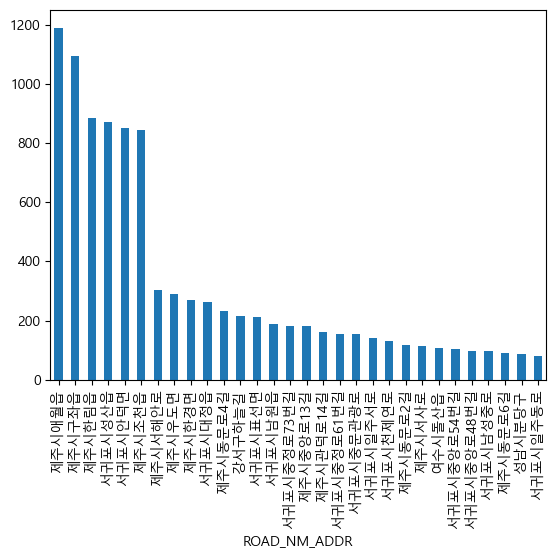

In [66]:
# 상위 10개만 시각화
data['ROAD_NM_ADDR'].value_counts().head(30).plot(kind='bar')
plt.show()

In [67]:
data['LOTNO_ADDR'].unique()

array(['중구운서동', '군산시옥도면', '목포시죽동', ..., '부천시중동', '강화군양사면', '서귀포시도순동'],
      dtype=object)

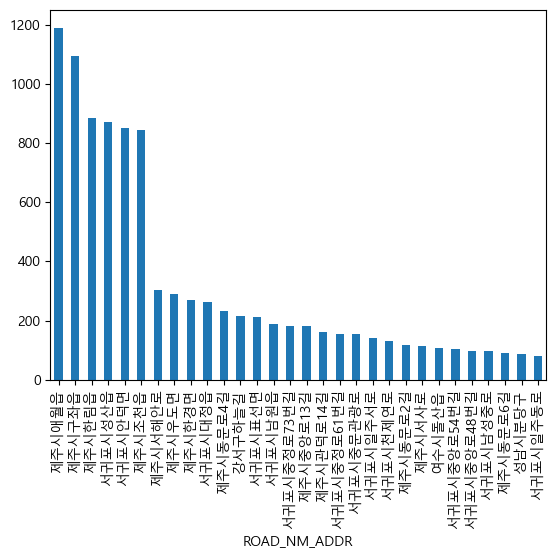

In [68]:
# 상위 30개만 시각화
data['ROAD_NM_ADDR'].value_counts().head(30).plot(kind='bar')
plt.show()

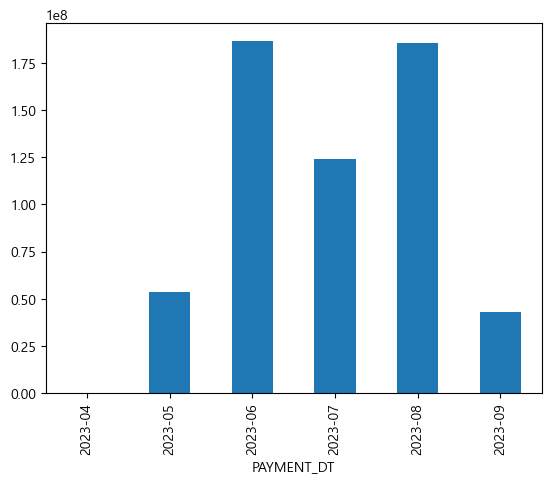

In [69]:
# 월별 소비 총액
data.groupby('PAYMENT_DT')['PAYMENT_AMT_WON'].sum().plot(kind='bar')
plt.show()

<Axes: xlabel='ROAD_NM_ADDR'>

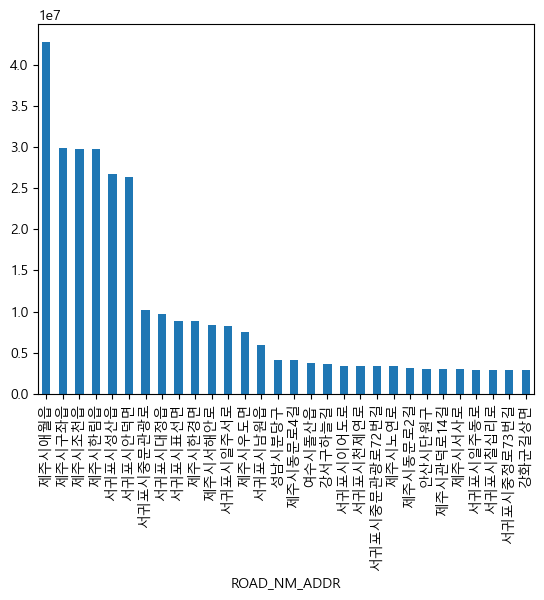

In [70]:
# 지역별 소비 총액 상위 30개만
data.groupby('ROAD_NM_ADDR')['PAYMENT_AMT_WON'].sum().sort_values(ascending=False).head(30).plot(kind='bar')

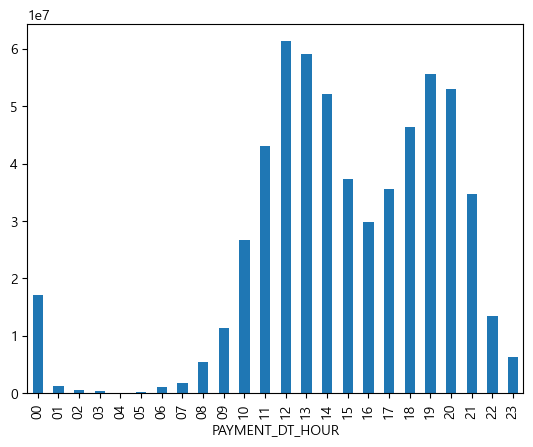

In [71]:
# 시간대 별 소비 총액
data.groupby('PAYMENT_DT_HOUR')['PAYMENT_AMT_WON'].sum().plot(kind='bar')
plt.show()

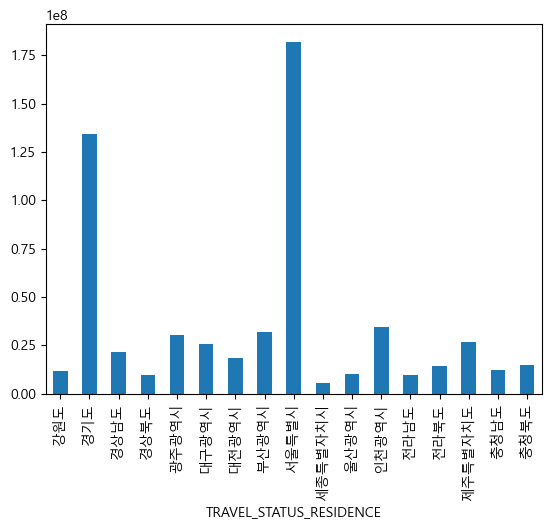

In [72]:
# TRAVEL_STATUS_RESIDENCE별 소비 총액
data.groupby('TRAVEL_STATUS_RESIDENCE')['PAYMENT_AMT_WON'].sum().plot(kind='bar')
plt.show()

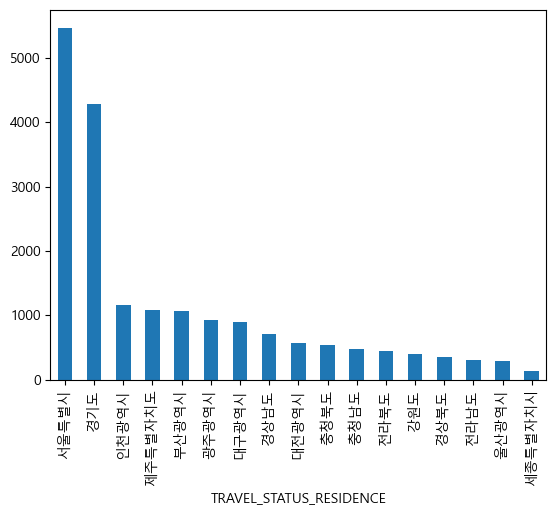

In [75]:
# TRAVEL_STATUS_RESIDENCE 개수
data['TRAVEL_STATUS_RESIDENCE'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='TRAVEL_STATUS_RESIDENCE'>

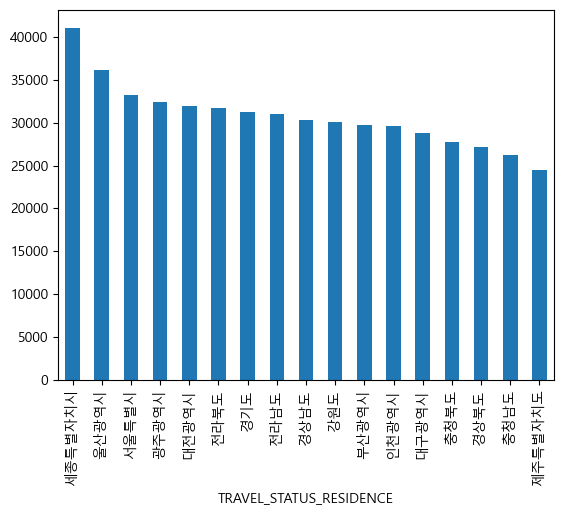

In [74]:
# TRAVEL_STATUS_RESIDENCE(거주지)별 소비 평균
data.groupby('TRAVEL_STATUS_RESIDENCE')['PAYMENT_AMT_WON'].mean().sort_values(ascending=False).plot(kind='bar')